### Day 1 Afternoon: Notebook to Explore Metadata associated with Single Amplified Genomes

**Note:** Make sure you are using the biopy kernel when running this notebook.

In [1]:
import pandas as pd       # data frame importing and manipulation
import matplotlib.pyplot as plt  # plotting
import seaborn as sns # additional plotting library that allows us to make nice looking, simple plots easily
from collections import Counter  # Simple function that will count items in a list

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
assembly_stats_file = "AG-910_assembly_stats_updated.csv"
df = pd.read_csv(assembly_stats_file)

#### Let's get a handle on this dataframe

What columns are in this data frame?

In [3]:
df.columns

Index(['Sample_ID', 'well_type', 'wga_cp', 'wgs_run_id', 'raw_read_count',
       'final_contigs_count', 'final_assembly_length', 'max_contig_length',
       'gc_content', 'checkM_estimated_completeness', 'number_multi_copy',
       'checkM_classification', 'SSU_classification_1'],
      dtype='object')

What sorts of well types do we have?

In [4]:
Counter(df['well_type'])

Counter({'1 cell': 317, 'No drop': 64, '10 cells': 3})

* '1 cell' indicates our single sorted cells
* 'No drop' are negative controls
* '10 cells' are positive controls

Let's look at how the different well types line up:

<AxesSubplot:xlabel='well_type', ylabel='raw_read_count'>

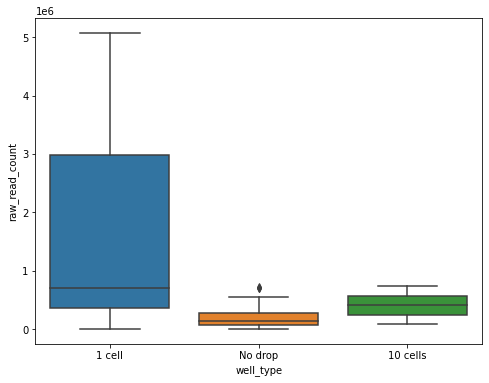

In [5]:
#df['raw_read_count'] = [int(i.replace(',','')) for i in df['raw_read_count']]
sns.boxplot(x = 'well_type', y = 'raw_read_count', data = df)

<AxesSubplot:xlabel='well_type', ylabel='final_assembly_length'>

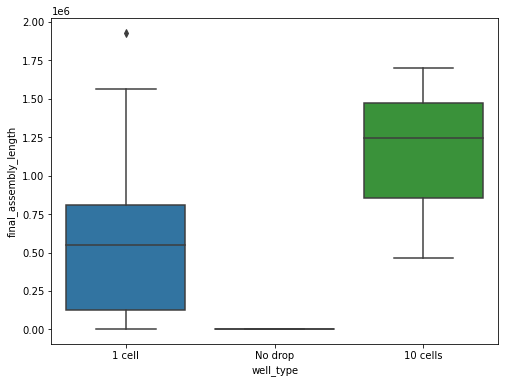

In [6]:
df[df['well_type'] == 'No drop'].dropna(subset = ['final_assembly_length'])
sns.boxplot(x = 'well_type', y = 'final_assembly_length', data = df)

Now let's consider only what we'd call successful assemblies.  Those 1 cell sorts for which the final_assembly_length is greater than 20kb.

In [7]:
# let's examine 'successful' cells, those with a final assembly length > 20kb

gdf = df[(df['final_assembly_length'] >= 20000) & (df['well_type'] == '1 cell')]

To get an overall description of the numeric columns, you can use the pd.describe() method:

In [8]:
gdf.describe()

,wga_cp,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,number_multi_copy
count,226.000000,2.260000e+02,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000
mean,2.543889,2.222619e+06,30.070796,5.882286e+05,97201.115044,31.726725,37.688451,0.022124
std,0.820294,1.397194e+06,15.091553,3.793381e+05,72127.020420,5.263667,26.050413,0.174984
min,1.722054,6.158900e+04,2.000000,2.169600e+04,4603.000000,22.885452,0.000000,0.000000
25%,2.074146,6.176092e+05,20.000000,2.324260e+05,40837.250000,29.447514,12.677500,0.000000
50%,2.301344,2.552710e+06,30.000000,6.328365e+05,90563.000000,30.129477,40.540000,0.000000
75%,2.615989,3.260680e+06,39.750000,8.805288e+05,132836.000000,31.886013,56.630000,0.000000
max,7.279798,5.080878e+06,77.000000,1.930694e+06,376794.000000,62.754383,93.190000,2.000000


To look into distributions of values, use ```sns.histplot```

<AxesSubplot:xlabel='gc_content', ylabel='Count'>

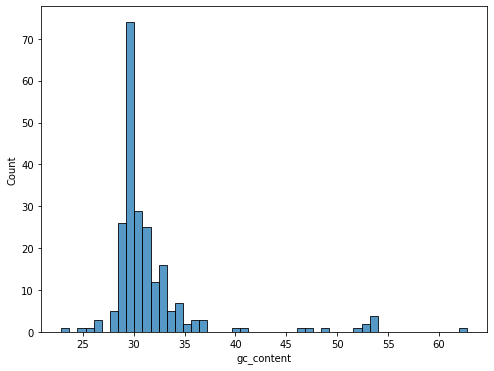

In [9]:
# gc_content distribution

sns.histplot(gdf['gc_content'])

<AxesSubplot:xlabel='final_assembly_length', ylabel='Count'>

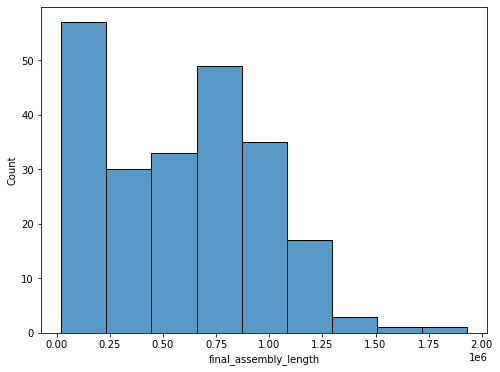

In [10]:
# assembly length distribution

sns.histplot(gdf['final_assembly_length'])

Examine distributions of other aspects of the assembly stats below:

### Let's now consider 16S ribosomal gene classifications

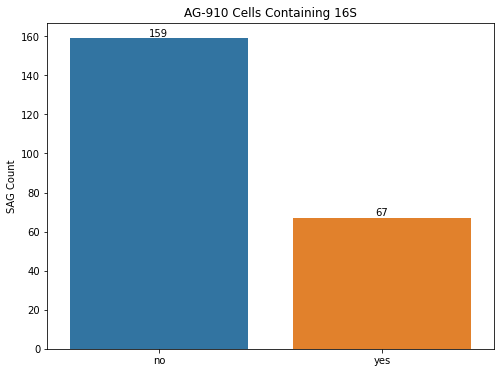

In [11]:
classified_16s = ['no' if 'no SSU' in i else 'yes' for i in gdf['SSU_classification_1']]

ax = sns.countplot(x = classified_16s)

ax.set(ylabel="SAG Count",
       title="AG-910 Cells Containing 16S")

# show count on top of bar
ax.bar_label(ax.containers[0])

plt.show()

Was there a difference in assembly length for cells that were and were not classified via 16S?

[Text(0, 0.5, 'Final Assembly Length'),
 Text(0.5, 0, 'Contains Classified 16S')]

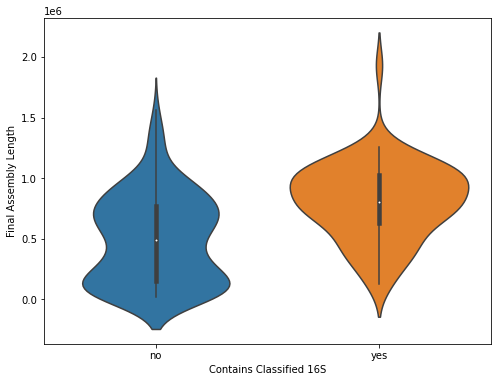

In [12]:
ax = sns.violinplot(x = classified_16s, y = 'final_assembly_length', data = gdf)

ax.set(ylabel = 'Final Assembly Length',
       xlabel = 'Contains Classified 16S')

How do assembly stats relate to phylogeny?

Look at assembly size distribution by phlogenetic Order for 16S containing cells:

In [13]:
df['SSU_classification_1'][1]

'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__SAR86_clade;g__?;s__?'

We want to grab the order, which is the 4th item in this ';' separated phylogeny.  Since python uses 0-based indexing, order is indexed as 3.

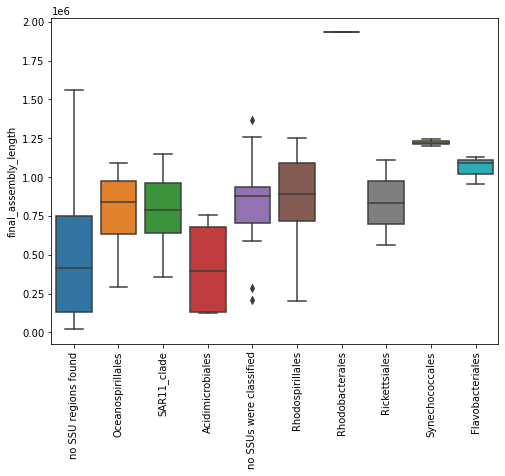

In [14]:
orders = [i if len(i.split(";")) == 1 else i.split(";")[3].replace("o__",'') for i in gdf['SSU_classification_1']]

ax = sns.boxplot(x = orders, y = gdf['final_assembly_length'])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

Ramunas' favorite plot.  
It looks better in R, see cp_vs_completeness_stepanauskas.R

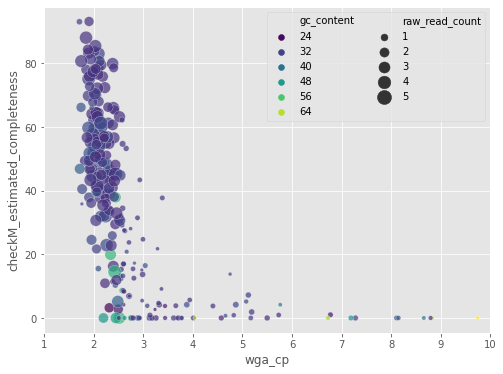

In [19]:
plt.style.use('ggplot')

ax = sns.scatterplot(x = 'wga_cp',
                y = 'checkM_estimated_completeness', 
                data = df, 
                hue = 'gc_content',
                size = df['raw_read_count'], 
               palette = 'viridis', 
               alpha = 0.7,   # makes dots transparent
                sizes = (10, 200))

ax.legend(loc = 'upper right', ncol = 2)
ax.set_xlim(1, 10)
plt.show()

Space for plotting other parameters against eachother...

NameError: name 'Inte' is not defined